## Clustering

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### Data preprocessing

In [ ]:
global_chart_track_features.isna().sum()

explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
single_release      0
dtype: int64

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(global_chart_track_features)

In [ ]:
def optimise_k_means(data, max_k=10):
    inertias = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, n_init="auto", random_state=2022)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)
    plt.plot(range(1, max_k + 1), inertias)
    plt.xticks(range(1, max_k + 1))
    plt.xlabel("Number of clusters")
    plt.ylabel("Inertia")
    plt.show()

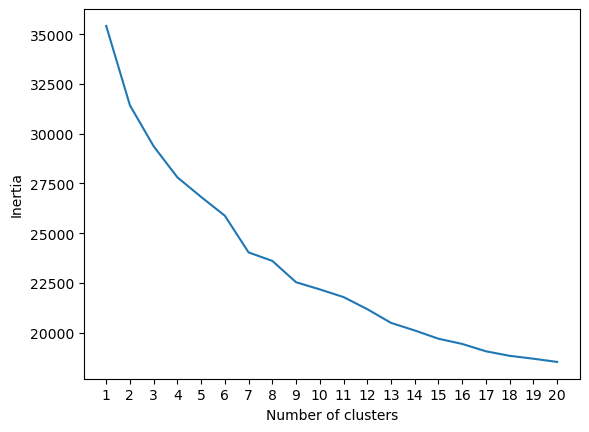

In [ ]:
optimise_k_means(scaled_features, max_k=20)

In [ ]:
kmeans = KMeans(n_clusters=7, n_init="auto", random_state=2022)

In [ ]:
kmeans.fit(scaled_features)

KMeans(n_clusters=7, n_init='auto', random_state=2022)

In [ ]:
result_df = pd.DataFrame(
    scaled_features,
    columns=[col + "_standardized" for col in global_chart_track_features.columns],
    index=global_chart_track_features.index,
)
result_df


,explicit_standardized,danceability_standardized,energy_standardized,key_standardized,loudness_standardized,mode_standardized,speechiness_standardized,acousticness_standardized,instrumentalness_standardized,liveness_standardized,valence_standardized,tempo_standardized,duration_ms_standardized,time_signature_standardized,single_release_standardized
id,,,,,,,,,,,,,,,
000xQL6tZNLJzIrtIgxqSl,-0.911171,0.483617,0.036669,0.522176,0.182911,0.844602,-0.514923,-0.422060,-0.14994,-0.685078,0.196500,-0.016206,-0.329671,0.099907,1.296113
00Blm7zeNqgYLPtW6zg8cj,1.097489,0.052971,0.985293,-1.106075,0.663572,0.844602,-0.606096,-0.802654,-0.14994,-0.755352,0.930366,-0.822930,-0.228708,0.099907,1.296113
00ko9WaS4jOX1kEk3gvHjf,1.097489,1.549643,-0.690199,1.064926,-0.607449,0.844602,2.187629,-0.941136,-0.14994,-0.887207,0.532109,0.961942,0.423789,0.099907,-0.771538
00lNx0OcTJrS3MKHcB80HY,1.097489,1.387268,0.295385,1.607677,0.173085,-1.183989,0.104882,-0.293724,-0.14994,0.037951,0.903517,0.086332,0.182713,0.099907,1.296113
017PF4Q3l4DBUiWoXk4OWT,-0.911171,0.356541,0.664979,-0.291950,1.202793,-1.183989,-0.309994,-0.277682,-0.14992,1.226095,-0.058563,-0.284069,0.341183,0.099907,-0.771538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7yyRTcZmCiyzzJlNzGC9Ol,1.097489,1.457866,-0.591641,0.793551,-0.351987,0.844602,0.046331,-0.000959,-0.14994,-0.889380,1.019861,0.826831,0.409317,0.099907,-0.771538
7z4xW9WY86uH3gd1V9pfCM,1.097489,1.041339,-0.308285,1.607677,-0.571684,0.844602,2.011976,-0.869228,-0.14994,-0.099700,0.626080,0.693573,-1.176506,0.099907,-0.771538
7zLGHiDWd9T1Rxw4PQCb13,1.097489,-0.723605,-0.172768,1.064926,0.659642,-1.183989,0.096518,2.260953,-0.14994,3.211164,0.424714,-0.028063,1.990913,3.469637,1.296113


In [ ]:
result_df["label"] = kmeans.labels_
result_df

,explicit_standardized,danceability_standardized,energy_standardized,key_standardized,loudness_standardized,mode_standardized,speechiness_standardized,acousticness_standardized,instrumentalness_standardized,liveness_standardized,valence_standardized,tempo_standardized,duration_ms_standardized,time_signature_standardized,single_release_standardized,label
id,,,,,,,,,,,,,,,,
000xQL6tZNLJzIrtIgxqSl,-0.911171,0.483617,0.036669,0.522176,0.182911,0.844602,-0.514923,-0.422060,-0.14994,-0.685078,0.196500,-0.016206,-0.329671,0.099907,1.296113,0
00Blm7zeNqgYLPtW6zg8cj,1.097489,0.052971,0.985293,-1.106075,0.663572,0.844602,-0.606096,-0.802654,-0.14994,-0.755352,0.930366,-0.822930,-0.228708,0.099907,1.296113,0
00ko9WaS4jOX1kEk3gvHjf,1.097489,1.549643,-0.690199,1.064926,-0.607449,0.844602,2.187629,-0.941136,-0.14994,-0.887207,0.532109,0.961942,0.423789,0.099907,-0.771538,6
00lNx0OcTJrS3MKHcB80HY,1.097489,1.387268,0.295385,1.607677,0.173085,-1.183989,0.104882,-0.293724,-0.14994,0.037951,0.903517,0.086332,0.182713,0.099907,1.296113,6
017PF4Q3l4DBUiWoXk4OWT,-0.911171,0.356541,0.664979,-0.291950,1.202793,-1.183989,-0.309994,-0.277682,-0.14992,1.226095,-0.058563,-0.284069,0.341183,0.099907,-0.771538,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7yyRTcZmCiyzzJlNzGC9Ol,1.097489,1.457866,-0.591641,0.793551,-0.351987,0.844602,0.046331,-0.000959,-0.14994,-0.889380,1.019861,0.826831,0.409317,0.099907,-0.771538,6
7z4xW9WY86uH3gd1V9pfCM,1.097489,1.041339,-0.308285,1.607677,-0.571684,0.844602,2.011976,-0.869228,-0.14994,-0.099700,0.626080,0.693573,-1.176506,0.099907,-0.771538,6
7zLGHiDWd9T1Rxw4PQCb13,1.097489,-0.723605,-0.172768,1.064926,0.659642,-1.183989,0.096518,2.260953,-0.14994,3.211164,0.424714,-0.028063,1.990913,3.469637,1.296113,1


In [ ]:
track_genres_and_labels = pd.DataFrame(tracks.loc[:,"genres"]).join(result_df["label"], on="id", how="right")
track_genres_and_labels

,genres,label
id,,
000xQL6tZNLJzIrtIgxqSl,"[dance pop, pop, post-teen pop, uk pop, r&b, r...",0
00Blm7zeNqgYLPtW6zg8cj,"[dfw rap, melodic rap, rap, canadian contempor...",0
00ko9WaS4jOX1kEk3gvHjf,"[chicago rap, conscious hip hop, hip hop, pop ...",6
00lNx0OcTJrS3MKHcB80HY,"[dance pop, edm, electro house, house, pop, po...",6
017PF4Q3l4DBUiWoXk4OWT,"[dance pop, pop, uk pop]",2
...,...,...
7yyRTcZmCiyzzJlNzGC9Ol,"[pop rap, rap, underground hip hop, virginia h...",6
7z4xW9WY86uH3gd1V9pfCM,"[hip hop, rap, melodic rap, philly rap, trap, ...",6
7zLGHiDWd9T1Rxw4PQCb13,"[detroit hip hop, hip hop, rap, dance pop, pop...",1


In [ ]:
track_genres_and_labels.groupby("label").agg({"genres": lambda x: x.explode().value_counts().index[0]})

,genres
label,
0,pop
1,rap
2,pop
3,pop
4,pop
5,rap
6,rap
